In [2]:
# Import dependencies for pandas, numpy, matplotlib, config and sqlalchemy.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

In [8]:
engine = create_engine('postgresql://localhost:5432/sqlhw')
connection = engine.connect()


In [10]:
# Query All Records in the Salaries Table
salaries_data = pd.read_sql("SELECT * FROM salaries", connection)
salaries_data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [11]:
# Query All Records in the Titles Table
titles_data = pd.read_sql("SELECT * FROM titles", connection)
titles_data.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [20]:
employee_data = pd.read_sql("SELECT t.title, round(AVG(s.salary), 2) AS avg_salary \
                            FROM titles AS t \
                            INNER JOIN salaries AS s ON  \
                            (t.emp_no = s.emp_no) \
                            GROUP BY t.title;", connection)
employee_data

,title,avg_salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


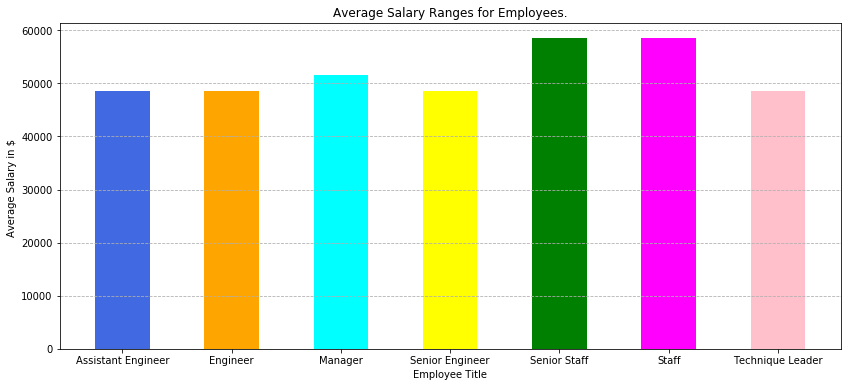

In [41]:
# Generate a bar plot showing average salary by employee title

x_axis = np.arange(len(employee_data))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(14,6))
plt.bar(x_axis, employee_data['avg_salary'] , color=['royalblue', 'orange', 'cyan', 'yellow', 'green', 'magenta', 'pink'], width=0.5, align="center")
plt.xticks(tick_locations,employee_data['title'] )
plt.title('Average Salary Ranges for Employees.')
plt.xlabel("Employee Title")
plt.ylabel("Average Salary in $ ")
plt.grid(axis ='y', linestyle='--')
plt.savefig("average_salary_by_title.png")
plt.show()